<a href="https://colab.research.google.com/github/bdrinconp/ml_stats_classes/blob/main/code_samples/clase4_completo_regresion_logistica_vf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos predictivos

# Modelos predictivos

##¿Qué es un modelo?

**Modelo:** Representación simplificada de un sistema del mundo real, diseñada para simular ciertos aspectos o comportamientos de este.

##¿Qué es un modelo predictivo?

**Modelo predictivo:** Es un tipo de modelo matemático o computacional utilizado para predecir un resultado futuro en función de variables de entrada.

1. Estos modelos se entrenan utilizando un conjunto de datos históricos.  
2. Una vez validados, se pueden aplicar a nuevos datos para hacer predicciones.

## ¿ Qué es un modelo de regresión?

**Modelo de regresión:** Es un tipo específico de modelo de aprendizaje automático que busca entender y describir la relación entre una variable dependiente y una o más variables independientes.  

El objetivo es modelar esta relación de manera que se pueda predecir la variable dependiente en función de nuevas observaciones de las variables independientes.

## ¿ Qué es la variable dependiente y las variables independientes?

**Variable dependiente:** Es aquella que se busca predecir en un modelo predictivo. Es la variable “objetivo” o “resultado” que se supone es influenciada o determinada por una o más variables independientes.   

**Variables independientes:** Son las variables que se utilizan para explicar, predecir o influir en la variable dependiente. Estas son las variables “explicativas” o “predictoras” en el modelo.

## Introducción a la regresión logística

1. Genera una probabilidad que se ajusta entre 0 y 1 a través de la función sigmoide, basada en los datos originales.

2. Forma parte de análisis supervisado, especialmente clasificación binaria.

3. $\beta_0$ es el intercepto y $\beta_1$ es el coeficiente de la variable, que juntos determinan combinación lineal antes de aplicar la función sigmoide.

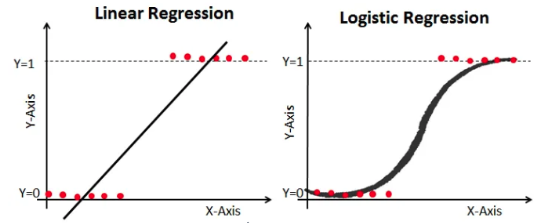


En este notebook aprenderemos qué es una regresión logística y cómo funciona con un ejemplo en Python. Para esto lo primero que tendremos que hacer es cargar las librerias, descargar los datos y entender qué contienen.

## Importando Librerias

[seaborn](https://seaborn.pydata.org/)  
[matplotlib](https://matplotlib.org/)  
[pandas](https://pandas.pydata.org/)  
[numpy](https://numpy.org/)   
[sklearn](https://scikit-learn.org/stable/) ⚡


In [ ]:
# Librerias
# ==============================================================================
# Manipulación de datos
import pandas as pd
import numpy as np
# Visualización
import seaborn as sns
import matplotlib.pyplot as plt

## Importando datos

**Contexto**
Predice el comportamiento para retener a los clientes. Puedes analizar todos los datos relevantes del cliente y desarrollar programas focalizados de retención de clientes. [Conjuntos de datos de muestra de IBM](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/)

**Contenido**
Cada fila representa a un cliente, cada columna contiene los atributos del cliente descritos en la metadatos de la columna.

El conjunto de datos incluye información sobre:

* Clientes que se fueron en el último mes – la columna se llama "Churn" (Deserción).
* Servicios para los cuales cada cliente se ha registrado – teléfono, líneas múltiples, internet, seguridad en línea, copia de seguridad en línea, protección de dispositivos, soporte técnico y streaming de TV y películas.
* Información de la cuenta del cliente – cuánto tiempo han sido clientes, contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales.
Información demográfica sobre los clientes – género, rango de edad y si tienen pareja y dependientes.


**Descripción Columnas**

[IBM - Descripción columnas](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)

* customerID: Identificador único para cada cliente.

* gender: Sexo del cliente (masculino o femenino).

* SeniorCitizen: Indicador si el cliente es un ciudadano senior o no (1: Sí, 0: No).

* Partner: Indica si el cliente tiene pareja (Sí, No).

* Dependents: Señala si el cliente tiene dependientes (Sí, No).

* tenure: Número de meses que el cliente ha estado con la compañía.

* PhoneService: Indica si el cliente cuenta con servicio telefónico (Sí, No).

* MultipleLines: Refleja si el cliente tiene múltiples líneas (Sí, No, Sin servicio telefónico).

* InternetService: Tipo de servicio de internet del cliente (DSL, Fibra óptica, Sin servicio).

* OnlineSecurity: Indica si el cliente tiene seguridad en línea (Sí, No, Sin servicio de internet).

* OnlineBackup: Indica si el cliente cuenta con respaldo en línea (Sí, No, Sin servicio de internet).

* DeviceProtection: Señala si el cliente tiene protección de dispositivo (Sí, No, Sin servicio de internet).

* TechSupport: Refleja si el cliente cuenta con soporte técnico (Sí, No, Sin servicio de internet).

* StreamingTV: Indica si el cliente tiene servicio de streaming de TV (Sí, No, Sin servicio de internet).

* StreamingMovies: Denota si el cliente cuenta con servicio de streaming de películas (Sí, No, Sin servicio de internet).

* Contract: Tipo de contrato del cliente (e.g., mensual, anual).

* PaperlessBilling: Indica si el cliente utiliza facturación sin papel (Sí, No).

* PaymentMethod: Método de pago preferido por el cliente (e.g., tarjeta de crédito, transferencia bancaria).

* MonthlyCharges: Cargos mensuales en la factura del cliente.

* TotalCharges: Cargos totales acumulados del cliente.

* Churn: Indica si el cliente dejó la compañía.

In [ ]:
# cargar datos
# ==============================================================================
df_data = pd.read_csv('telco_customer_churn.csv')
df_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# estructura del dataframe
# ==============================================================================
df_data.shape

(7043, 21)

In [ ]:
# información del dataframe
# ==============================================================================
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# revisión de datos faltantes
# ==============================================================================
df_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Cambiar total_charges a numeric

In [ ]:
# TotalCharges es tipo object, pero sabemos que debe ser un valor numerico
# ==============================================================================
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors='coerce')

In [ ]:
# Vamos a imputar los datos faltantes de TotalCharges
# ==============================================================================
df_data['TotalCharges'] = df_data['TotalCharges'].fillna((df_data['TotalCharges'].median()))
df_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# información del dataframe
# ==============================================================================
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Revisión de valores unicos
#===============================================================================
for col in df_data.columns:
  print(f"{col}: {df_data[col].nunique()} valores unicos")

customerID: 7043 valores unicos
gender: 2 valores unicos
SeniorCitizen: 2 valores unicos
Partner: 2 valores unicos
Dependents: 2 valores unicos
tenure: 73 valores unicos
PhoneService: 2 valores unicos
MultipleLines: 3 valores unicos
InternetService: 3 valores unicos
OnlineSecurity: 3 valores unicos
OnlineBackup: 3 valores unicos
DeviceProtection: 3 valores unicos
TechSupport: 3 valores unicos
StreamingTV: 3 valores unicos
StreamingMovies: 3 valores unicos
Contract: 3 valores unicos
PaperlessBilling: 2 valores unicos
PaymentMethod: 4 valores unicos
MonthlyCharges: 1585 valores unicos
TotalCharges: 6531 valores unicos
Churn: 2 valores unicos


## Eliminar id

Cuando trabajamos con datos, a menudo nos encontramos con la necesidad de proteger la identidad de las personas involucradas. Esto es lo que llamamos anonimización. Es una buena práctica, especialmente cuando se manejan datos sensibles o personales. Así que, para asegurarnos de mantener la privacidad, vamos a eliminar la columna 'customerID', que es básicamente una etiqueta única para cada cliente.

In [ ]:
# Eliminar la columnas customerID
# ==============================================================================
df_data.drop('customerID',axis=1,inplace=True)

## Convertir a numérico variable objetivo

Desde una perspectiva técnica y considerando las buenas prácticas en el modelado, es evidente que nuestra variable objetivo, denominada "Churn", está categorizada con las etiquetas "Yes" y "No". Para optimizar el proceso de análisis y facilitar la implementación de algoritmos, es recomendable proceder con la recodificación de dichos valores.


In [ ]:
# Recodificar churn
# ==============================================================================
df_data['Churn'].replace(to_replace='Yes', value = 1, inplace=True)
df_data['Churn'].replace(to_replace='No', value = 0, inplace=True)

In [ ]:
# Hacemos una copia del dataframe original para manipular los datos con confianza
# ==============================================================================
df_data_processing = df_data.copy()

## Manejo de variables categóricas

**Label Encoding:**

El Label Encoding es un método que convierte categorías en una secuencia numérica, asignando un valor único a cada categoría. Por ejemplo, si tuviéramos una variable categórica con los valores "bajo", "medio" y "alto", podríamos codificarlos como 0, 1 y 2, respectivamente. Esta técnica es especialmente útil cuando las categorías tienen un orden natural o jerarquía. Sin embargo, se debe usar con precaución en categorías no ordinales, ya que los algoritmos podrían interpretar erróneamente la secuencia numérica como ordinal.

**One Hot Encoding:**

El One Hot Encoding es una técnica que convierte variables categóricas en un formato binario. Para cada categoría de la variable, se crea una nueva columna, y se asigna un 1 si la categoría está presente y 0 si no lo está. Por ejemplo, para una variable con valores "rojo", "verde" y "azul", se crearían tres columnas, y un registro con el valor "rojo" tendría un 1 en la columna correspondiente a "rojo" y un 0 en las otras dos. Esta técnica es ideal para categorías sin un orden específico y evita que los algoritmos malinterpreten relaciones ordinales inexistentes.

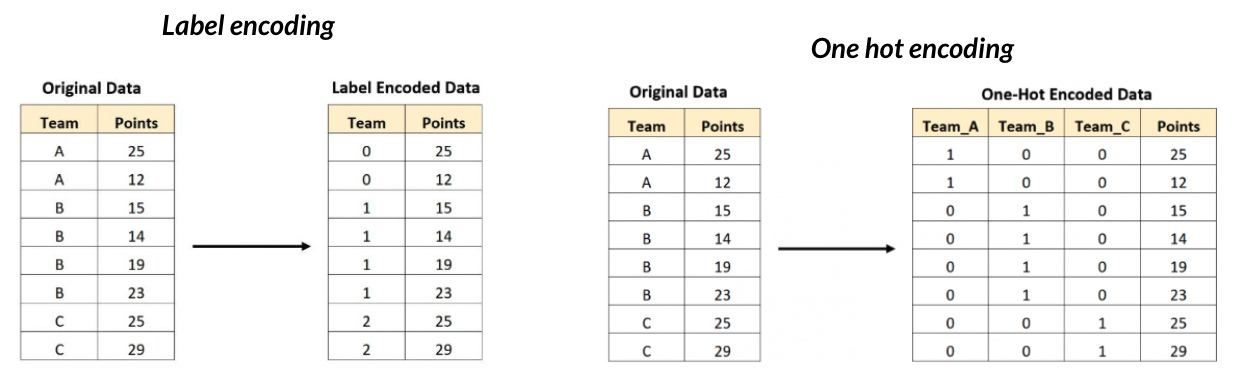

In [ ]:
# one-hot-encoding
# ==============================================================================
#df_data_processing = pd.get_dummies(df_data_processing)
#df_data_processing.head()

In [ ]:
# one-hot-encoding
# ==============================================================================
df_data_processing = pd.get_dummies(df_data_processing, drop_first=True)
df_data_processing.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


## Analisis de correlación

In [ ]:
# correlación
# ==============================================================================
#df_data_processing.corr()
#sns.heatmap(df_data_processing.corr(), annot = True)
#df_data_processing.corr()['Churn']

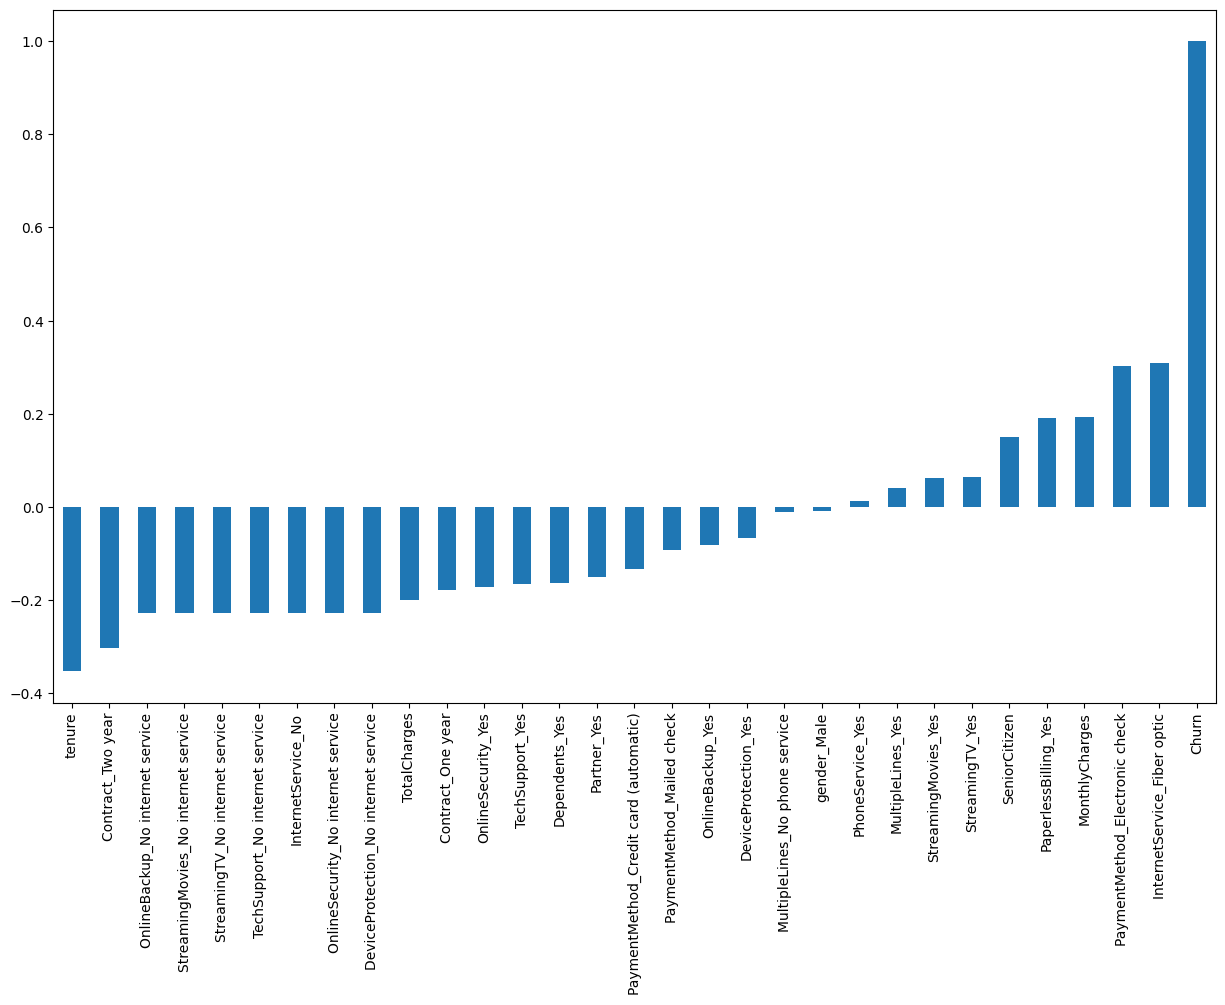

In [ ]:
# correlación
# ==============================================================================
fig = plt.figure(figsize=(15,9))
df_data_processing.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

## Escalabilidad de los datos

1. Normalización (Min-Max Scaling)

Este es uno de los métodos más comunes y se refiere al proceso de reescalar las características para que queden dentro de un rango específico, generalmente [0,1].

**Fórmula**

$$ X_{norm} = \frac{X-X_{min}}{X_{max}-X_{min}} $$

Donde:

* $X$ es el valor original.
* $X_{min}$ es el valor mínimo de la característica.
* $X_{max}$ es el valor máximo de la característica.

2. Estandarización (Z-score normalización)

La estandarización centra los datos alrededor de cero y escala en función de la desviación estándar. Es muy útil cuando no se conoce la distribución de los datos o se asume que la distribución no es gaussiana.

**Fórmula**

$$ Z = \frac{X-\mu}{\sigma} $$

Donde:

* $X$ es el valor original.
* $\mu$ es la media de la característica.
* $\sigma$ es la desviación estándar de la característica.


3. Escalamiento Robusto

Este método es similar a la estandarización, pero utiliza la mediana y el rango intercuartílico (IQR) en lugar de la media y la desviación estándar. Es robusto frente a outliers.

**Fórmula**

$$ X_{robust} = \frac{X-Q_{1}}{Q_{3}-Q_{1}} $$

Donde:

* $X$ es el valor original.
* $Q_{1}$ es el primer cuartil de la característica.
* $Q_{3}$ es el tercer cuartil de la característica.

In [ ]:
# Importamos el escalador MIN-MAX
# ==============================================================================
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Creamos el objeto scaler y lo aplicamos a los datos
# ==============================================================================
scaler = MinMaxScaler()
df_data_processing_scaled =  scaler.fit_transform(df_data_processing)

In [ ]:
# los nuevos datos "escalados" perdieron el formato
# ==============================================================================
df_data_processing_scaled

array([[0.        , 0.01388889, 0.11542289, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.47222222, 0.38507463, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.02777778, 0.35422886, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.15277778, 0.11293532, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.05555556, 0.55870647, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.91666667, 0.86965174, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# Creamos el objeto scaler y lo aplicamos a los datos
# ==============================================================================
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)

In [ ]:
# revisamos ... upps y las columnas?
# ==============================================================================
df_data_processing_scaled

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.013889,0.115423,0.001275,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.215867,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.010310,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.210241,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.015330,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.333333,0.662189,0.227521,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7039,0.0,1.000000,0.845274,0.847461,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7040,0.0,0.152778,0.112935,0.037809,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7041,1.0,0.055556,0.558706,0.033210,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
# indicamos que las columnas son las mismas del df_data_processing
# ==============================================================================
df_data_processing_scaled.columns = df_data_processing.columns

In [ ]:
# revisamos ... y ahora todo bien!
# ==============================================================================
df_data_processing_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,0.001275,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.215867,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.010310,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.210241,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.015330,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Análisis exploratorio de datos

<Axes: xlabel='gender', ylabel='count'>

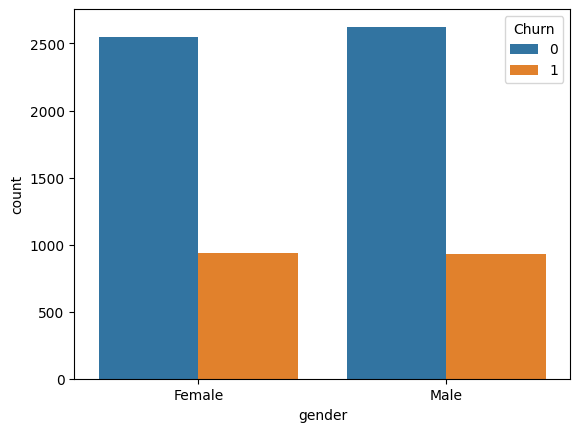

In [ ]:
# Exploración de genero y tipo de churn (observe que lo hacemos con df_data)
# ==============================================================================
sns.countplot(data=df_data, x='gender',hue='Churn')

In [ ]:
# Exploración de las columnas categoricas y tipo de churn (observe que lo hacemos con df_data)
# ==============================================================================
# Vamos a crear una función que nos permita hacer los graficos mas rapido

def plot_categorial(column):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data=df_data, x=column,hue='Churn')
    plt.title(column + ' vs churn')

In [ ]:
# Extraemos las columnas que son tipo 'object'
# ==============================================================================
column_cat = df_data.select_dtypes(include='object').columns

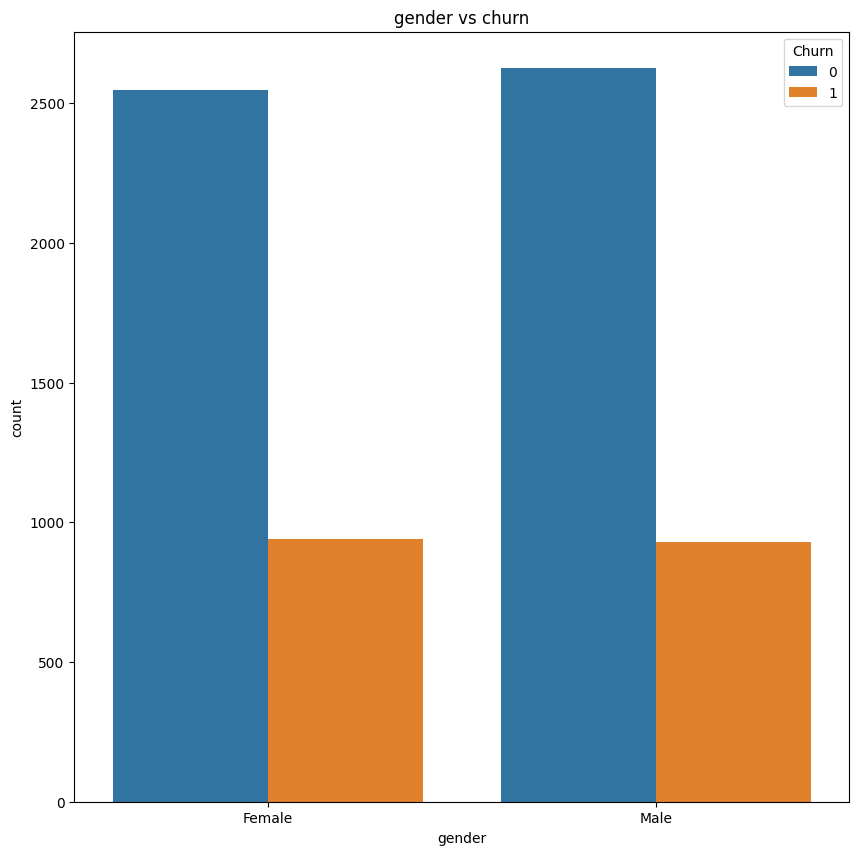

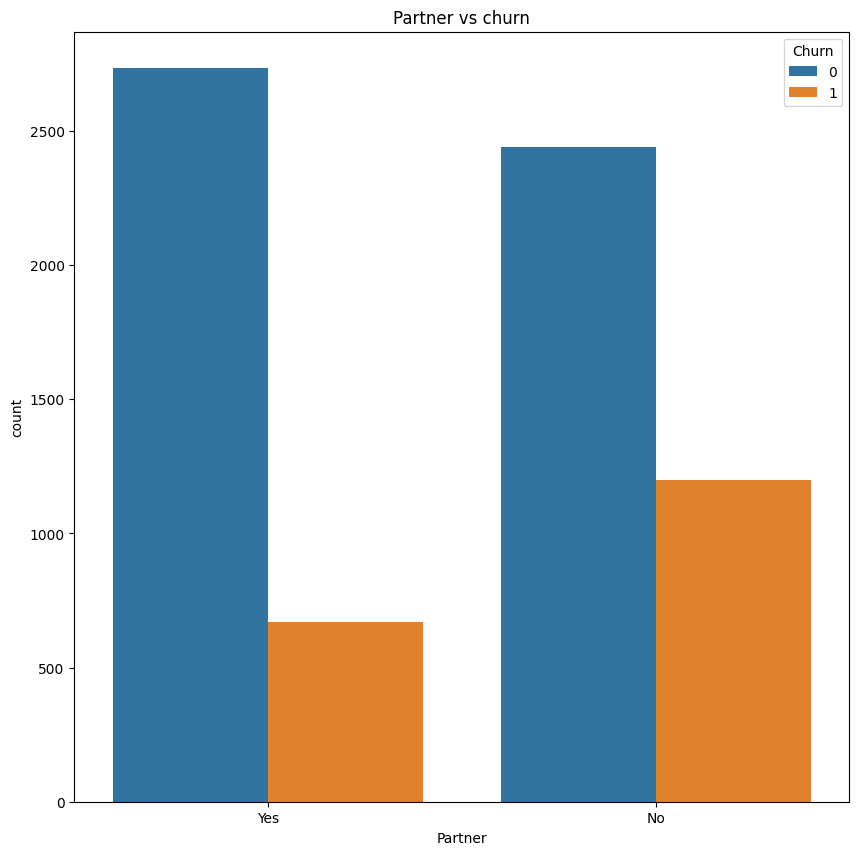

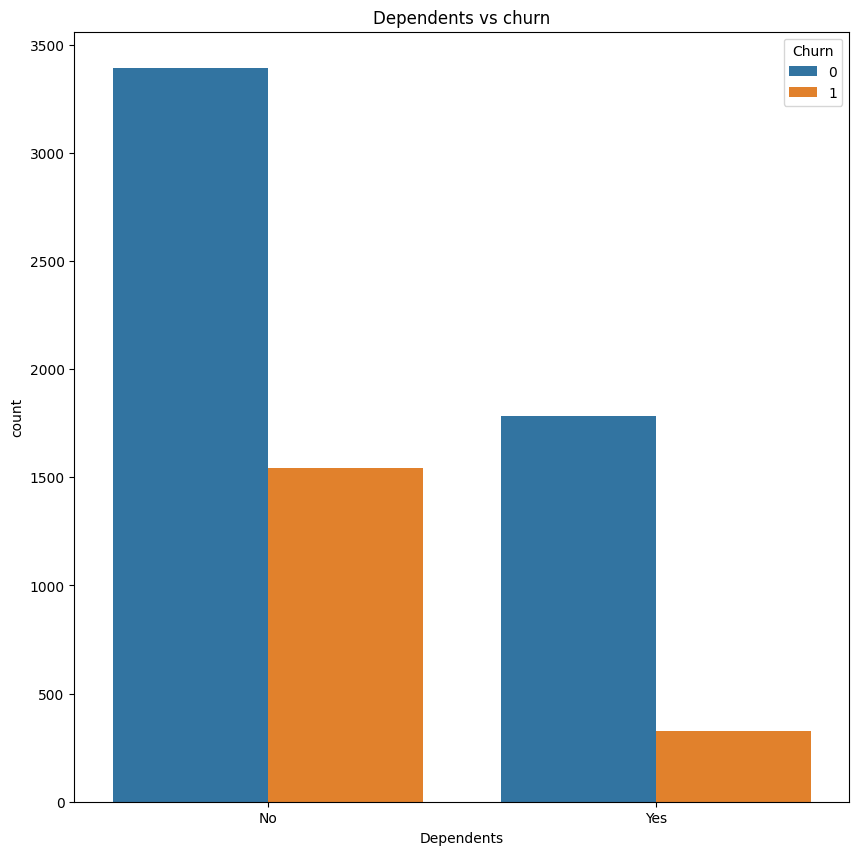

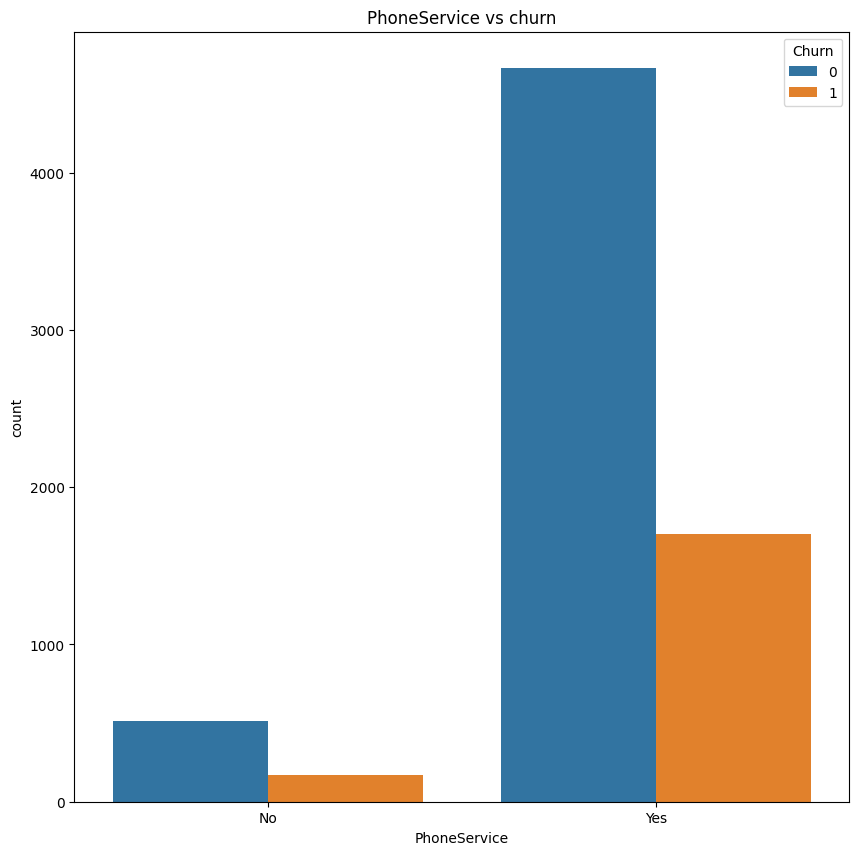

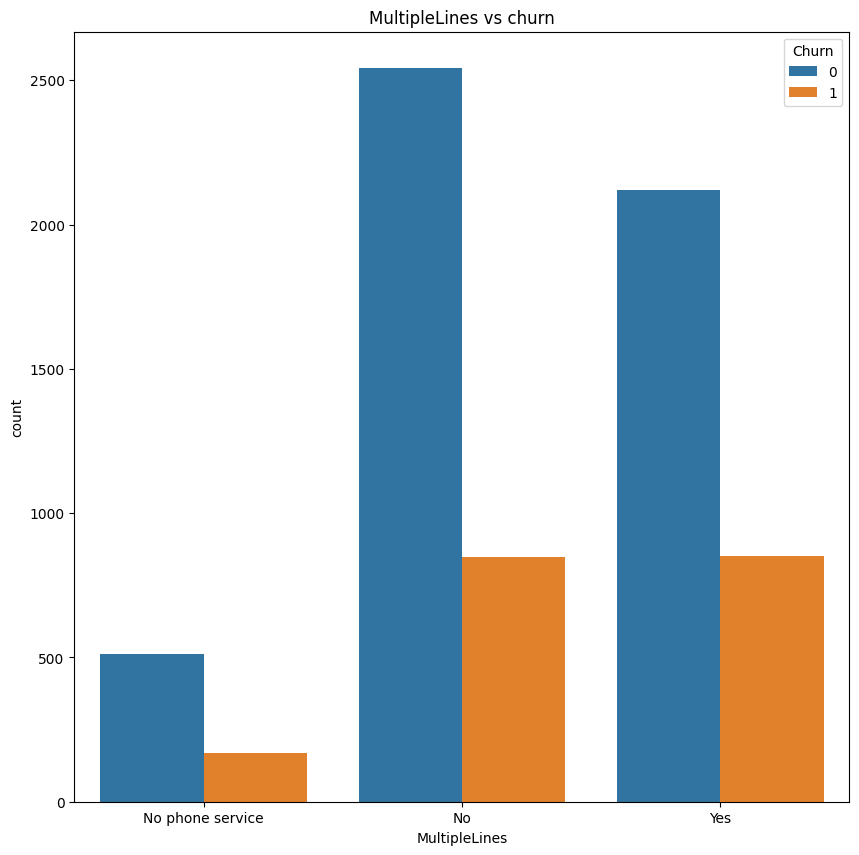

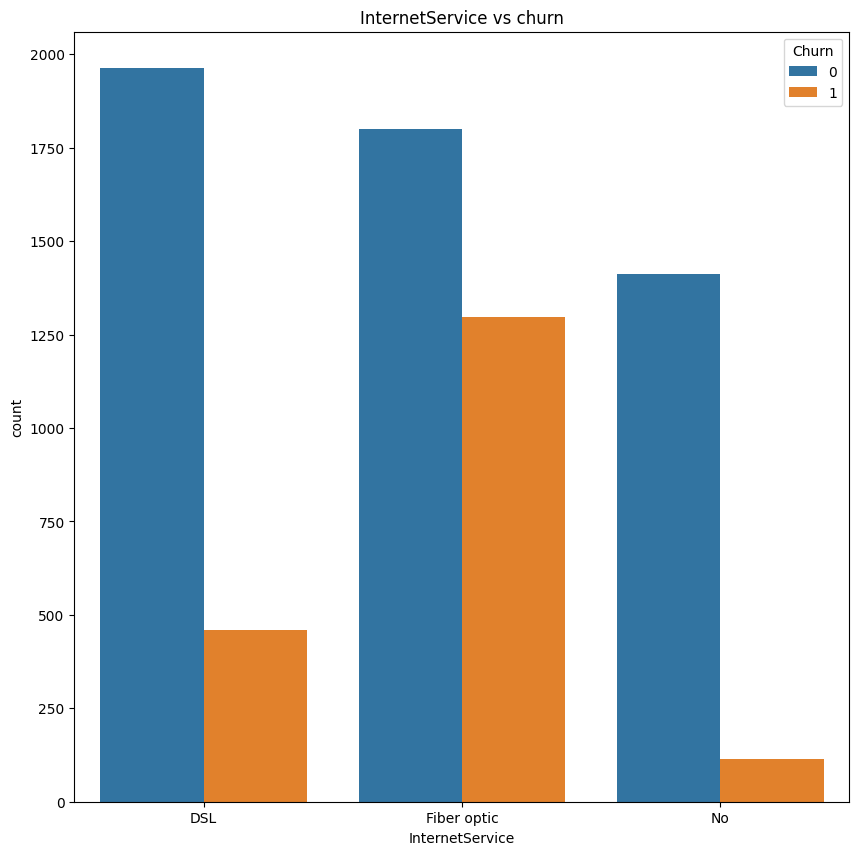

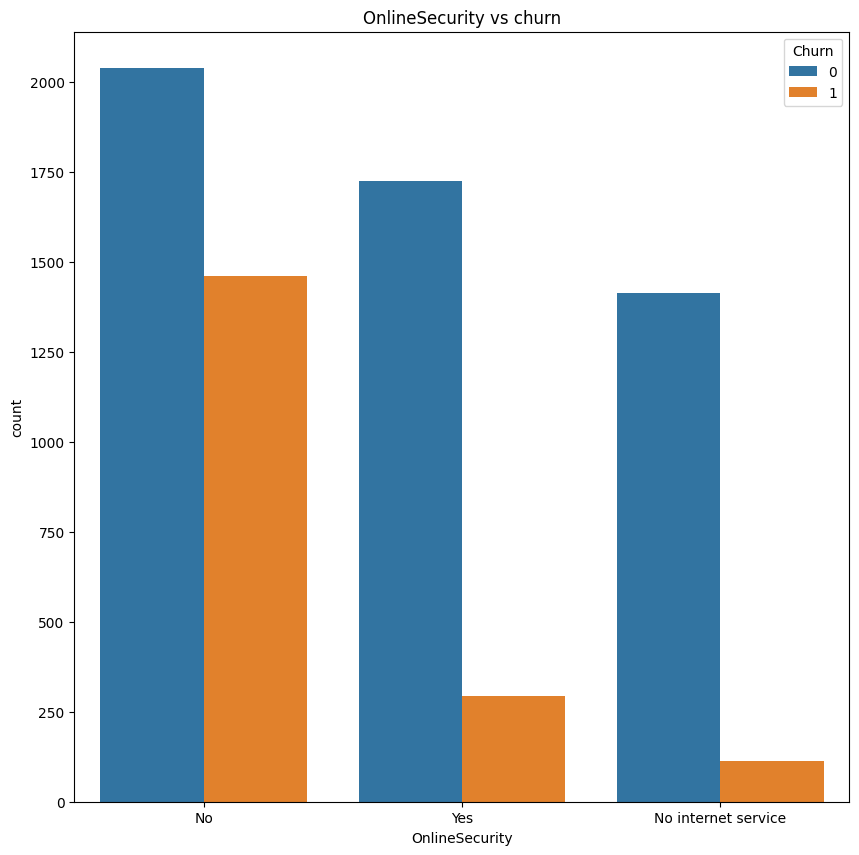

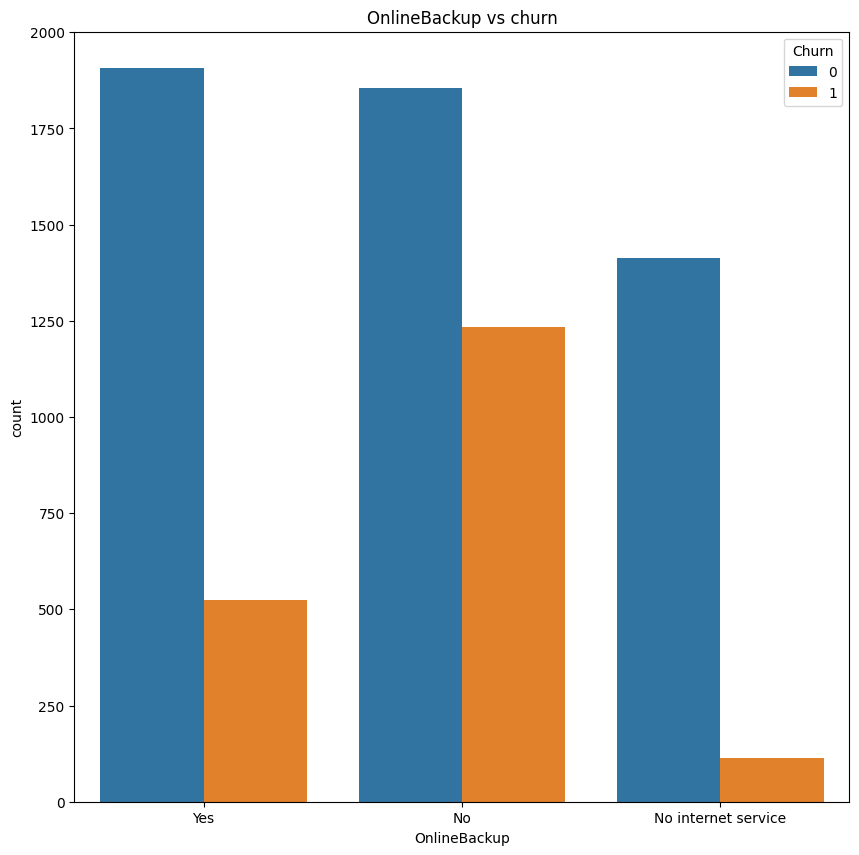

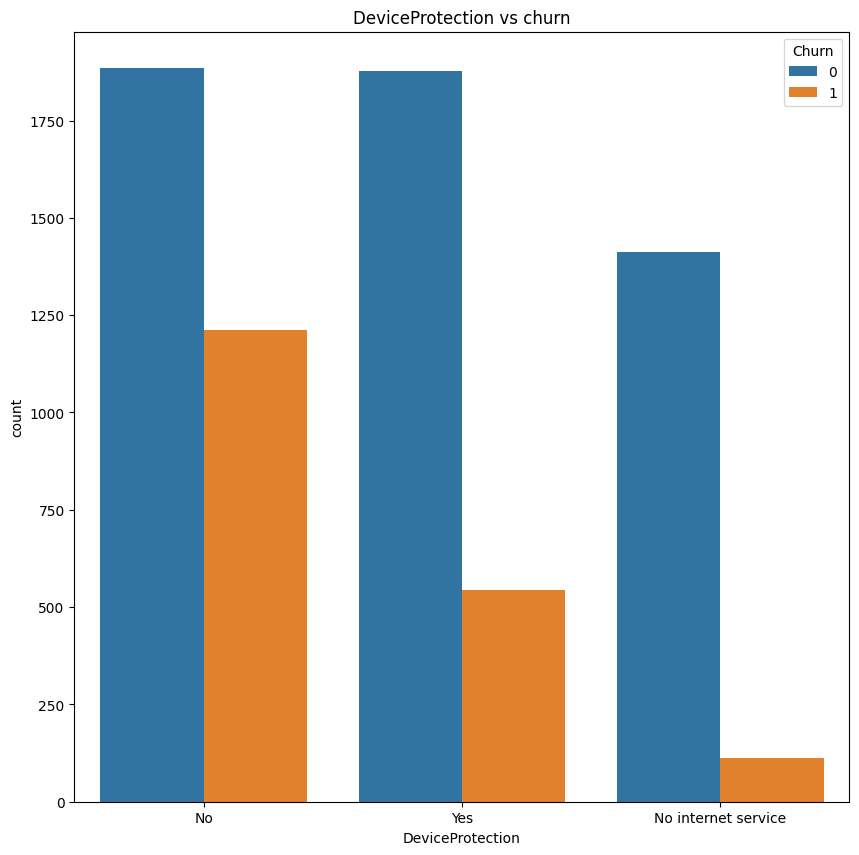

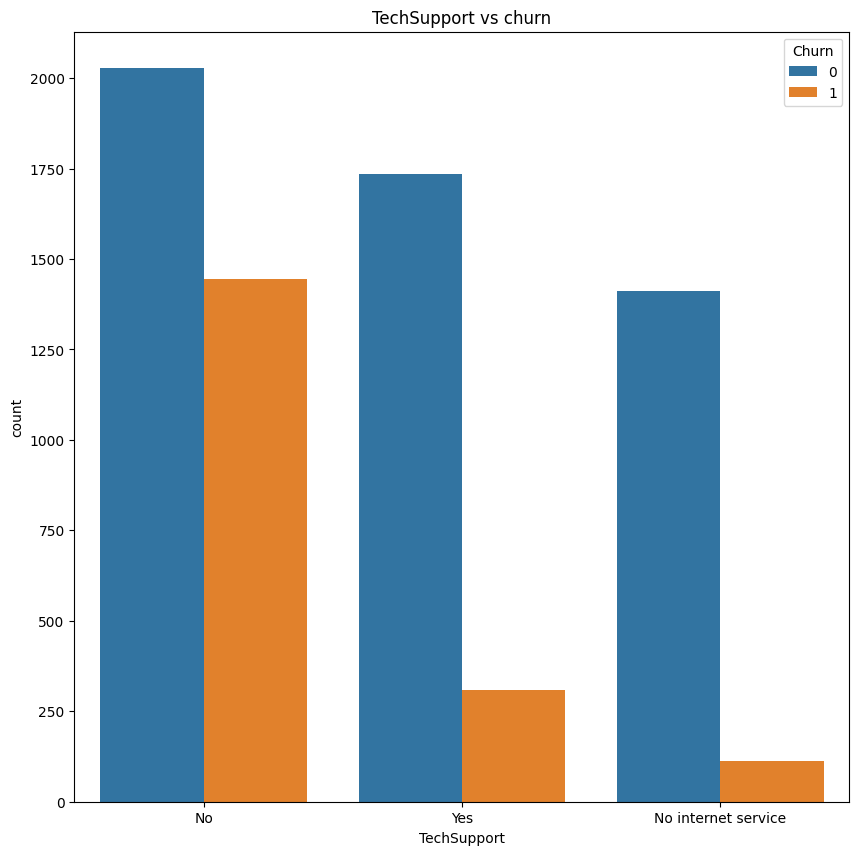

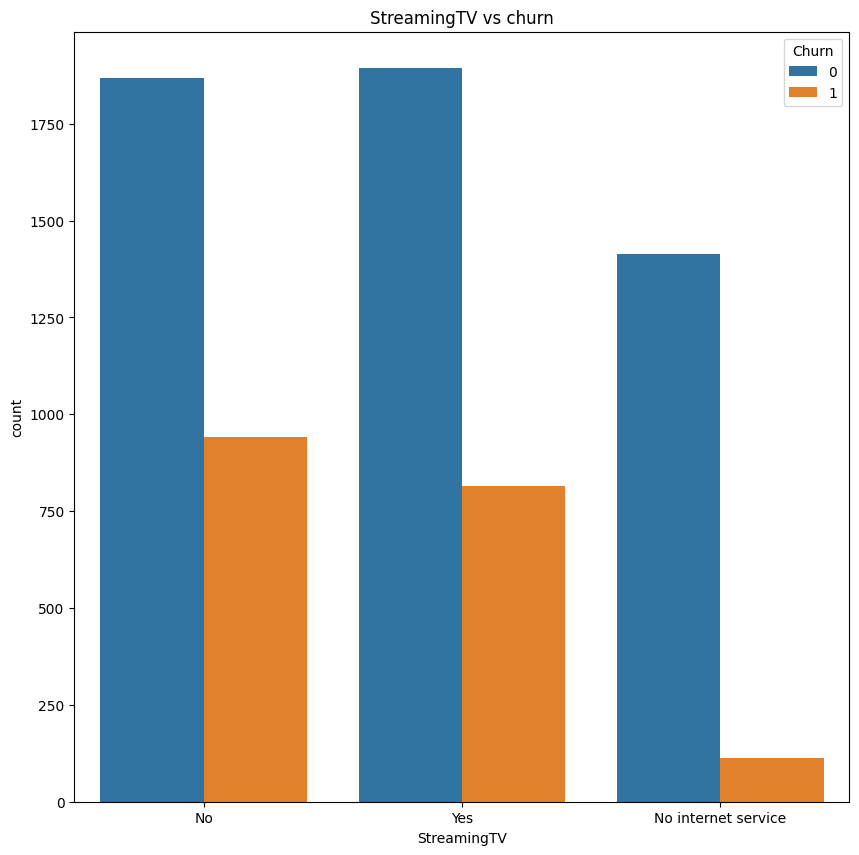

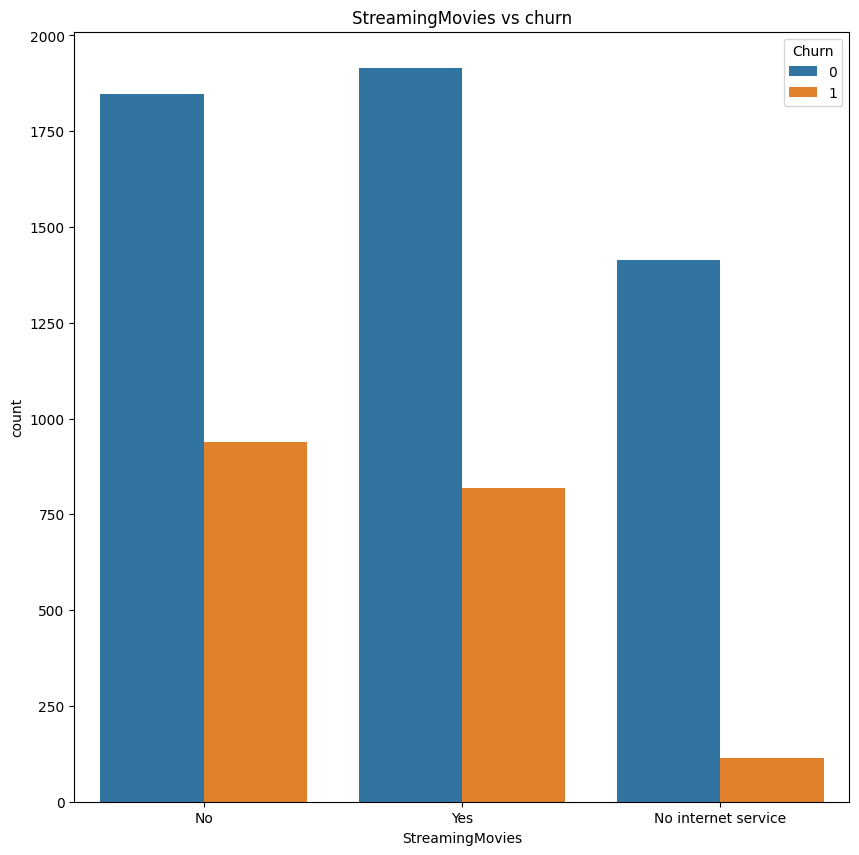

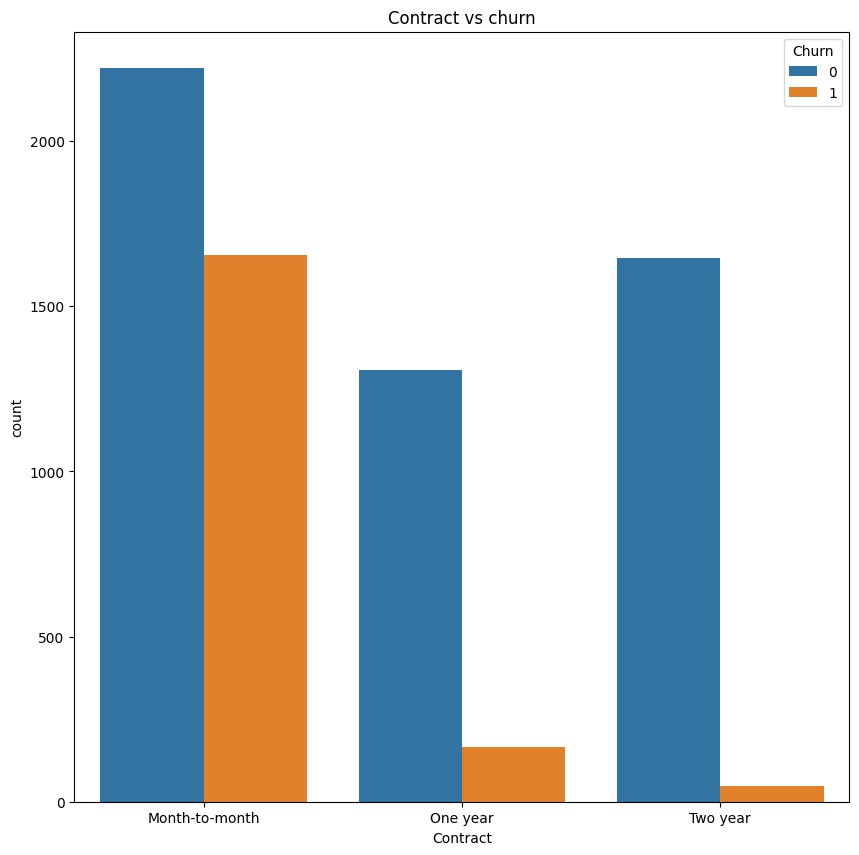

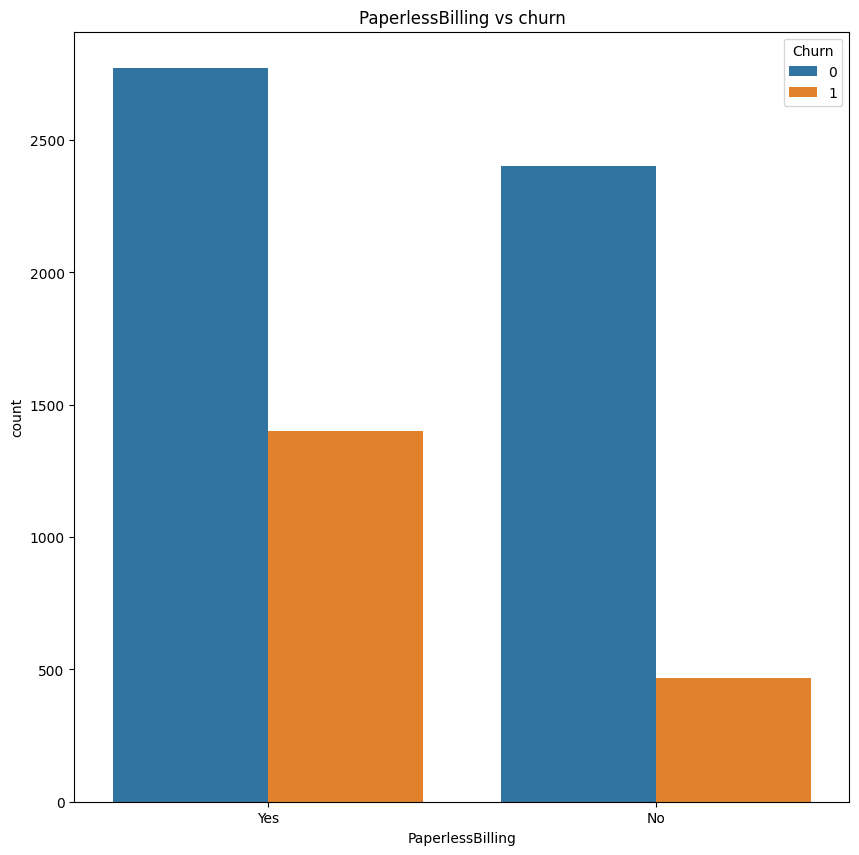

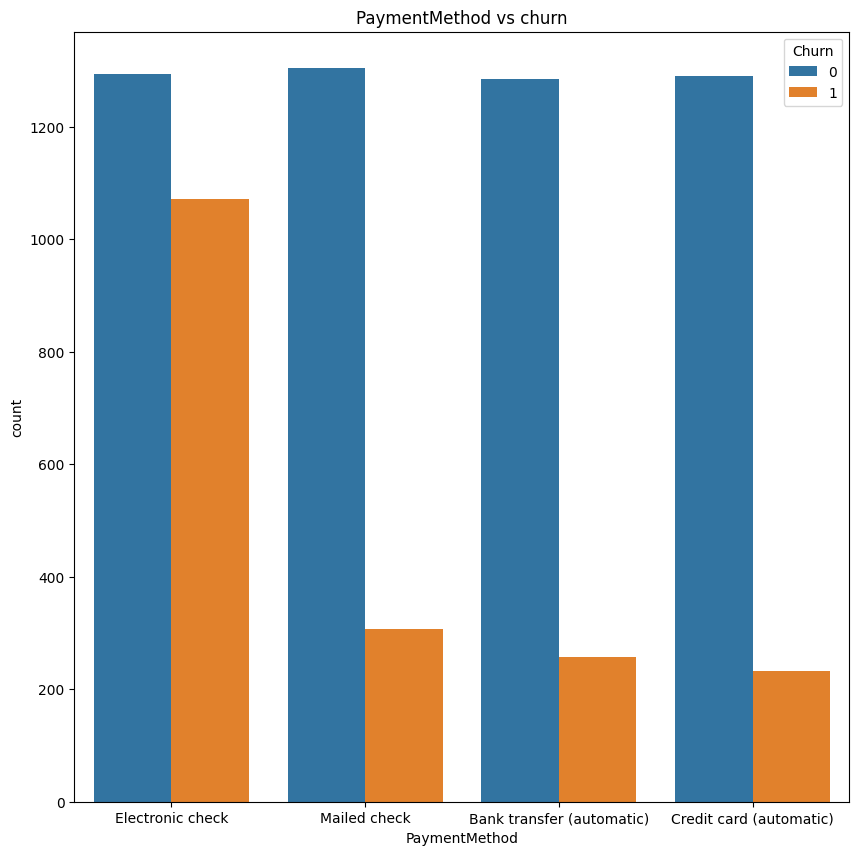

In [ ]:
# realizamos los graficos de todas las columnas categoricas
# ==============================================================================
for col in column_cat:
    plot_categorial(col)

In [ ]:
# comportamiento de las variables numericas vs churn
# ==============================================================================
#fig = plt.figure(figsize=(10,10))
#sns.pairplot(data= df_data, hue='Churn')

## Entrenamiento del modelo de regresión logística

In [ ]:
# Variables/Columnas
# ==============================================================================
df_data_processing_scaled.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
# creamos nuestro conjunto de variables independientes y la variable dependiente
# ==============================================================================
X = df_data_processing_scaled[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']].drop('Churn',axis=1)

y = df_data_processing_scaled['Churn'].values #'SeniorCitizen', 'tenure','gender_Male', 'Dependents_Yes',

In [ ]:
# creamos nuestra particion de conjunto de entrenamiento y test
# ==============================================================================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y) # stratify= 'Churn'

In [ ]:
# regularización y busqueda del mejor modelo
# ==============================================================================
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir el espacio de parámetros que será explorado por GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100,500,1000], # C es el inverso de la regularización lambda
    'penalty': ['l1', 'l2'],
    'solver': ['saga'] # 'saga' es compatible con todas las penalizaciones
}

# Crear el modelo de regresión logística
logistic_model = LogisticRegression(max_iter=1000)

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='recall', verbose=1) #accuracy, roc_auc, f1, recall #https://scikit-learn.org/stable/modules/model_evaluation.html

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print("Mejores parámetros: ", grid_search.best_params_)

# Ver el mejor modelo encontrado
print("Mejor modelo: ", grid_search.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejores parámetros:  {'C': 500, 'penalty': 'l1', 'solver': 'saga'}
Mejor modelo:  LogisticRegression(C=500, max_iter=1000, penalty='l1', solver='saga')


In [ ]:
# ajustamos el modelo
# ==============================================================================
model = LogisticRegression(C=500, max_iter=1000, solver='saga', penalty= 'l1')
result = model.fit(X_train, y_train)

In [ ]:
# validación cruzada
# ==============================================================================
from sklearn.model_selection import cross_val_score

# Evaluar el mejor modelo usando validación cruzada de 5 folds con alguna métrica de evaluación (accuracy, roc_auc, f1, recall ... )
mejor_modelo_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')

print("Mejor Modelo Accuracy scores:", mejor_modelo_scores)
print("Mejor Modelo Average recall:", mejor_modelo_scores.mean())

Mejor Modelo Accuracy scores: [0.5440613  0.56321839 0.5648855  0.54961832 0.54198473]
Mejor Modelo Average recall: 0.5527536486209821


## Evaluación
### Interpretación del modelo

In [ ]:
# Predicciones de test
# ==============================================================================
model.predict_proba(X_test)

array([[0.42239393, 0.57760607],
       [0.96605578, 0.03394422],
       [0.22862663, 0.77137337],
       ...,
       [0.96439799, 0.03560201],
       [0.44061008, 0.55938992],
       [0.9654449 , 0.0345551 ]])

In [ ]:
# Coeficientes del modelo
# ==============================================================================
print(f"Coeficientes: {model.coef_}")
intercepto = model.intercept_[0]
print(f"Intercepto del modelo: {intercepto}")

Coeficientes: [[ 1.41871299e-01 -4.02090955e+00 -6.76447748e+00  2.64124406e+00
   2.93007948e-02 -6.20817315e-03 -2.65066577e-01  7.00042054e-01
  -1.70168261e-01  6.15305730e-01  2.35470978e+00 -3.73329928e-01
  -3.73329928e-01 -9.75290116e-02 -3.73329928e-01  1.36483863e-01
  -3.73329928e-01  2.67965933e-01 -3.73329928e-01 -4.07876801e-02
  -3.73329928e-01  8.25169589e-01 -3.73329928e-01  9.22933512e-01
  -7.31160276e-01 -1.35008684e+00  4.08189590e-01 -3.21529527e-02
   3.77908355e-01  9.24627140e-02]]
Intercepto del modelo: 0.5385330571343947


In [ ]:
# Variables en el modelo
# ==============================================================================
#model.feature_names_in_

Axes(0.125,0.11;0.775x0.77)


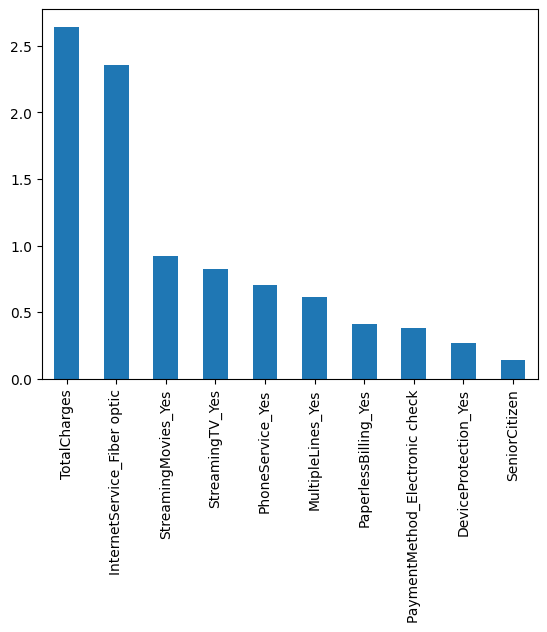

In [ ]:
# Variables en el modelo y sus coeficientes
# ==============================================================================
weights = pd.Series(model.coef_[0],
                    index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


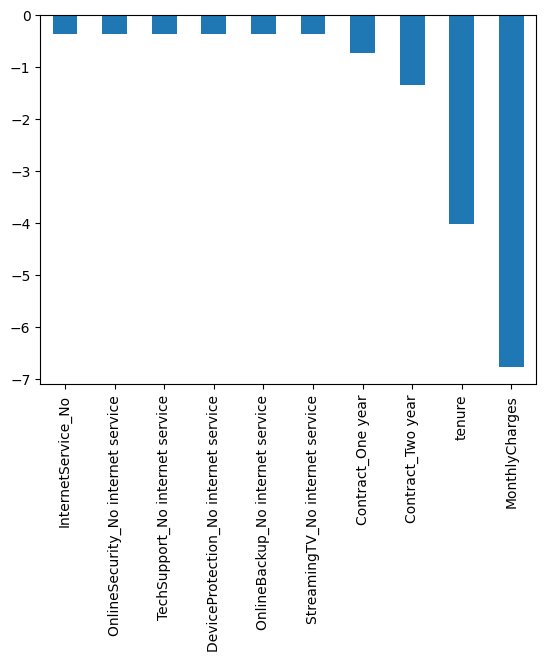

In [ ]:
# Variables en el modelo y sus coeficientes
# ==============================================================================
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

## Evaluación
### Desempeño del modelo

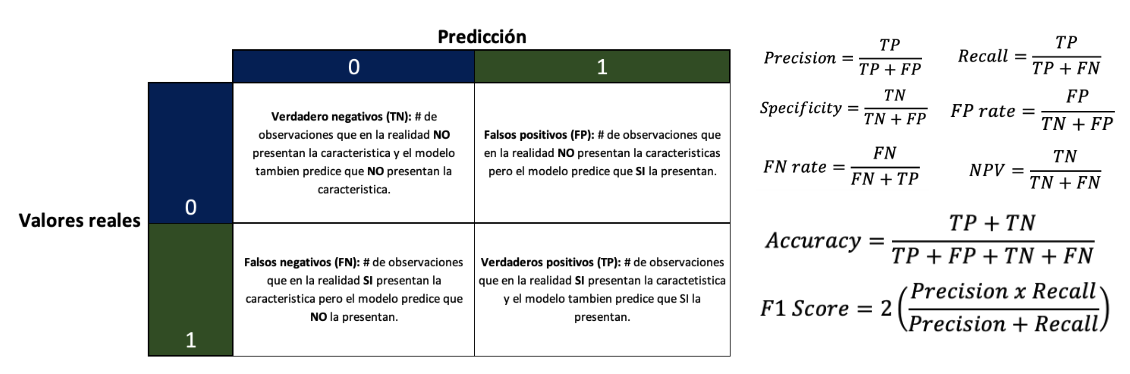

In [ ]:
# metricas del modelo
# ==============================================================================
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Verdaderos valores
y_true_test = y_test
y_true_train = y_train

# Predicciones del modelo
prediction_test = model.predict(X_test)
prediction_train = model.predict(X_train)

y_pred_test = prediction_test
y_pred_train = prediction_train

# Calculando las métricas
accuracy_test = accuracy_score(y_true_test, y_pred_test)
recall_test = recall_score(y_true_test, y_pred_test, average='binary')
precision_test = precision_score(y_true_test, y_pred_test, average='binary')
f1_test = f1_score(y_true_test, y_pred_test, average='binary')
conf_matrix_test = confusion_matrix(y_true_test, y_pred_test)

accuracy_train = accuracy_score(y_true_train, y_pred_train)
recall_train = recall_score(y_true_train, y_pred_train, average='binary')
precision_train = precision_score(y_true_train, y_pred_train, average='binary')
f1_train = f1_score(y_true_train, y_pred_train, average='binary')
conf_matrix_train = confusion_matrix(y_true_train, y_pred_train)


print("METRICAS TRAIN")
print("---------------------------------------------------------------------------------------------------------------------")
print(f'Precisión (Accuracy): {accuracy_train:.4f}')
print(f'Recall (Sensibilidad): {recall_train:.4f}')
print(f'Precisión (Precision): {precision_train:.4f}')
print(f'Valor-F (F-Score): {f1_train:.4f}')
print("METRICAS TEST")
print("---------------------------------------------------------------------------------------------------------------------")
print(f'Precisión (Accuracy): {accuracy_test:.4f}')
print(f'Recall (Sensibilidad): {recall_test:.4f}')
print(f'Precisión (Precision): {precision_test:.4f}')
print(f'Valor-F (F-Score): {f1_test:.4f}')

METRICAS TRAIN
---------------------------------------------------------------------------------------------------------------------
Precisión (Accuracy): 0.8059
Recall (Sensibilidad): 0.5520
Precisión (Precision): 0.6606
Valor-F (F-Score): 0.6014
METRICAS TEST
---------------------------------------------------------------------------------------------------------------------
Precisión (Accuracy): 0.8083
Recall (Sensibilidad): 0.5579
Precisión (Precision): 0.6660
Valor-F (F-Score): 0.6072


<Figure size 1100x1100 with 0 Axes>

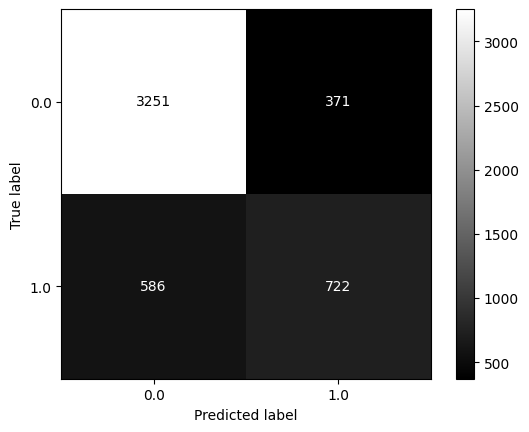

In [ ]:
# matriz de confusión TRAIN
# ==============================================================================
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_train, prediction_train, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

<Figure size 1100x1100 with 0 Axes>

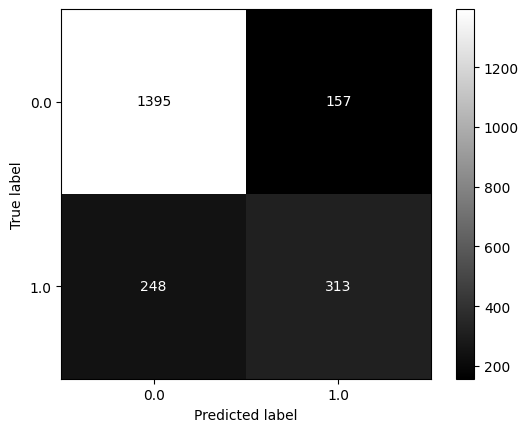

In [ ]:
# matriz de confusión TEST
# ==============================================================================
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

In [ ]:
# ROC y AUC solo para clasificación binaria
y_pred_proba_test = model.predict_proba(X_test)[:,1]
roc_auc_test = roc_auc_score(y_true_test, y_pred_proba_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_true_test, y_pred_proba_test)

y_pred_proba_train = model.predict_proba(X_train)[:,1]
roc_auc_train = roc_auc_score(y_true_train, y_pred_proba_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_true_train, y_pred_proba_train)

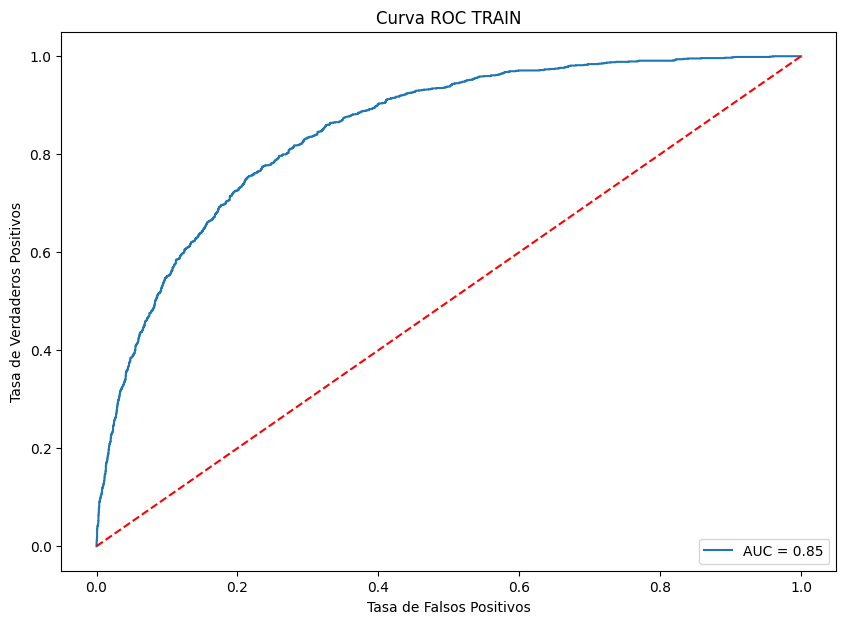

In [ ]:
# Gráfico de la Curva ROC TRAIN
# ==============================================================================
plt.figure(figsize=(10,7))
plt.plot(fpr_train, tpr_train, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC TRAIN')
plt.legend(loc="lower right")
plt.show()

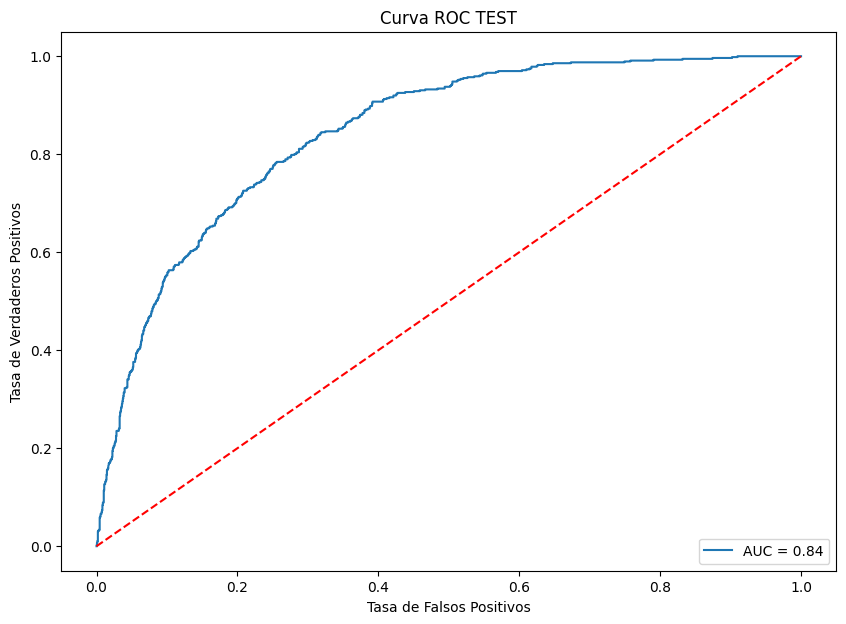

In [ ]:
# Gráfico de la Curva ROC
# ==============================================================================
plt.figure(figsize=(10,7))
plt.plot(fpr_test, tpr_test, label=f'AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC TEST')
plt.legend(loc="lower right")
plt.show()

## Aproximación a la visión estádistica

https://www.statsmodels.org/stable/index.html

In [ ]:
#X_train.columns

In [ ]:
X_train_logit = X_train[['SeniorCitizen', 'tenure','MonthlyCharges', 'Dependents_Yes', 'gender_Male', 'InternetService_Fiber optic', 'OnlineSecurity_Yes']]

In [ ]:
# Visión estadística del modelo
# ==============================================================================
import statsmodels.api as sm


# Añadir una columna de unos a las características para el término intercepto
X_train_logit = sm.add_constant(X_train_logit)

# El modelo desde el enfoque estadístico se estíma usando OLS (Ordinary Least Square - Minimos cuadrados ordinarios)
model = sm.Logit(y_train, X_train_logit).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.440602
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4922
Method:                           MLE   Df Model:                            7
Date:                Tue, 07 Nov 2023   Pseudo R-squ.:                  0.2384
Time:                        01:24:20   Log-Likelihood:                -2172.2
converged:                       True   LL-Null:                       -2852.2
Covariance Type:            nonrobust   LLR p-value:                1.663e-289
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.0342      0.095    -10.847      0.000   